In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(-0.5, 259.5, 193.5, -0.5)

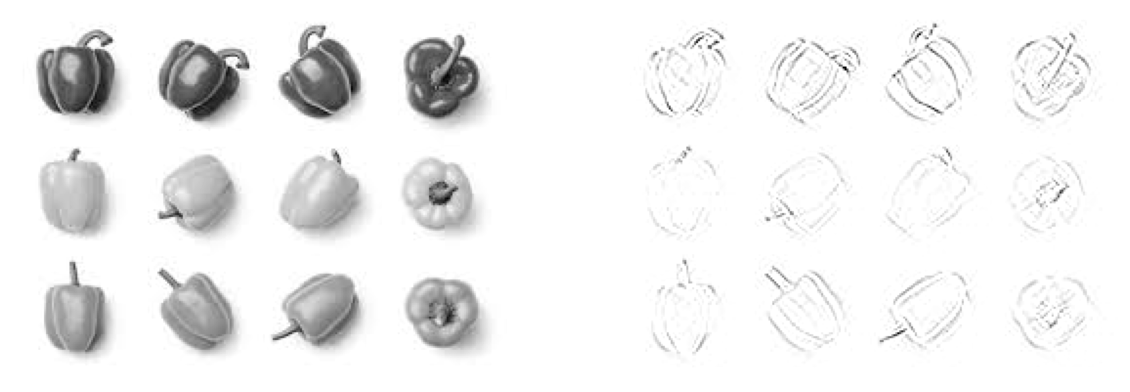

In [ ]:
#sobel
img = cv2.imread('peppers.jpg', 0)
edge = cv2.Sobel(img, cv2.CV_8U, 1, 1, ksize=3)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edge, cmap='binary')
plt.axis('off')

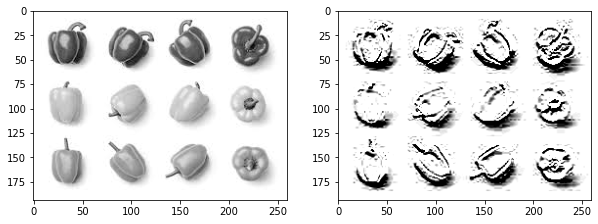

In [ ]:
#scharr
img = cv2.imread('peppers.jpg', 0)
edge = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=-1)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
#plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(edge, cmap='binary')
#plt.axis('off')

(-0.5, 259.5, 193.5, -0.5)

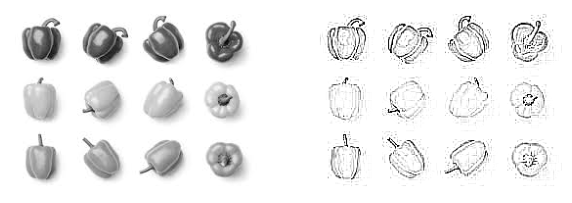

In [ ]:
#Laplacian
img = cv2.imread('peppers.jpg', 0)
edge = cv2.Laplacian(img, cv2.CV_8U, ksize=3)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(edge, cmap='binary')
plt.axis('off')

In [ ]:
#canny
def canny(image_path, alpha):

  img = cv2.imread(image_path, 0)
  alpha = alpha
  v = np.median(img)
  lower = int(max(0, 1-alpha)*v)
  upper = int(min(255, 1+alpha)*v)

  return cv2.Canny(img, lower, upper)

(-0.5, 259.5, 193.5, -0.5)

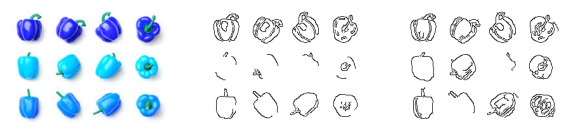

In [ ]:
img = cv2.imread('peppers.jpg')
image_path = 'peppers.jpg'
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(canny(image_path, 0.2), cmap='binary')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(canny(image_path, 0.9), cmap='binary')
plt.axis('off')

In [ ]:
#marked based watershed algorithm

img = cv2.imread('coin.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#binary
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
#sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)
#sure foreground
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
#unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
#marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
#add one to all labels so sure_fg become 1 not 0
markers = markers+1
#now mark the unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)
img[markers==-1] = [255,0,0]

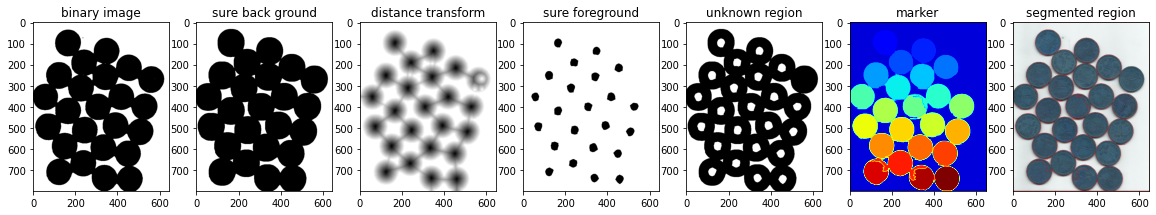

In [ ]:
#show result
plt.figure(figsize=(20,20))
plt.subplot(1,7,1)
plt.title('binary image')
plt.imshow(thresh, cmap='binary')
plt.subplot(1,7,2)
plt.title('sure back ground')
plt.imshow(sure_bg, cmap='binary')
plt.subplot(1,7,3)
plt.title('distance transform')
plt.imshow(dist_transform, cmap='binary')
plt.subplot(1,7,4)
plt.title('sure foreground')
plt.imshow(sure_fg, cmap='binary')
plt.subplot(1,7,5)
plt.title('unknown region')
plt.imshow(unknown, cmap='binary')
plt.subplot(1,7,6)
plt.title('marker')
plt.imshow(markers, cmap='jet')
plt.subplot(1,7,7)
plt.title('segmented region')
plt.imshow(img, cmap='jet')